# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [34]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [35]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [36]:
df['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [37]:
df['species'].isna().sum()

1

In [38]:
df['species']=df['species'].str.strip().str.lower()
df['species']=df['species'].replace(np.nan,'default')

In [39]:
df['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [40]:
for i in df.columns:
    df[i]=df[i].replace(np.nan,0)

<AxesSubplot:>

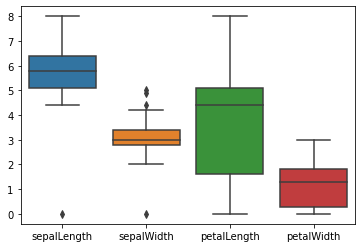

In [41]:
sns.boxplot(data=df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [42]:
for i in df['sepalLength']:
    if i>=4.0 and i<=7.0:
        df['label']=True
    else:
        df['label']=False
for i in df['sepalWidth']:
    if i>=2.0 and i<=4.5:
        df['label']=True
    else:
        df['label']=False
for i in df['petalLength']:
    if i>=1.0 and i<=7.0:
        df['label']=True
    else:
        df['label']=False
for i in df['petalWidth']:
    if i>=0.1 and i<=2.5:
        df['label']=True
    else:
        df['label']=False

4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

<AxesSubplot:xlabel='sepalLength', ylabel='petalLength'>

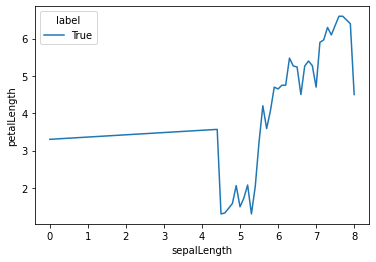

In [44]:
sns.lineplot(
    x='sepalLength',
    y='petalLength',
    hue='label',
    data=df,
    ci = None,
)   

<AxesSubplot:xlabel='sepalWidth', ylabel='petalWidth'>

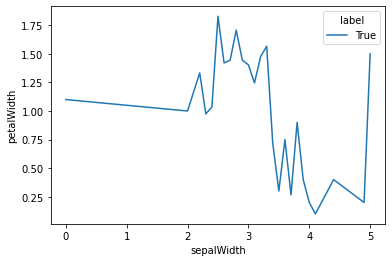

In [45]:
sns.lineplot(
    x='sepalWidth',
    y='petalWidth',
    hue='label',
    data=df,
    ci = None,
)   

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [48]:
df=df[(df['sepalLength']>=4.0) & (df['sepalLength']<=7.0)]
df=df[(df['sepalWidth']>=2.0) & (df['sepalWidth']<=4.5)]
df=df[(df['petalLength']>=1.0) & (df['petalLength']<=7.0)]
df=df[(df['petalWidth']>=0.1) & (df['petalWidth']<=2.5)]

In [49]:
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
5,6.7,3.1,5.6,2.4,virginica,True
6,5.8,2.8,5.1,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


<AxesSubplot:xlabel='sepalWidth', ylabel='petalWidth'>

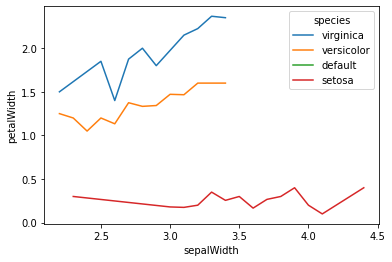

In [51]:
sns.lineplot(
    x='sepalWidth',
    y='petalWidth',
    hue='species',
    data=df,
    ci = None,
)   